Problem: $|\psi\rangle \rightarrow |\psi'\rangle = \exp(-iHt)|\psi\rangle$

Idea: $|\psi\rangle |0\rangle \rightarrow \sqrt p|\psi'\rangle|\rm{success}\rangle+\sqrt{1-p}|\psi'\rangle|\rm{fail}\rangle$

Method: LCU 

Task: Boost the success probability. E.g using amplitude amplification

Implement matrix 2x2 on quantum circuit

$A = \beta_0 I+\beta_1X+\beta_2Y+\beta_3Z$

LCU procedure

Subroutine: PREP: using 1 register with 2 ancilla qubit to store the coeffiences $\beta_i$ $|00\rangle \rightarrow \sum \beta_i|i\rangle$ $i = |00\rangle, |01\rangle, |10\rangle, |11\rangle.$

using 1 work register with 1 qubit to store the wave function

Subroutine: summation of unitaries

Adding the components of A with controlled gates

Subrountine: SELECT: measure the ancilla register and postselect the result in the work register

Hamiltonian simulation:
$\exp(-iHt) = \exp(-iH{\delta t})^n$ with $\delta t =  t/n$

Taylor approximation: 

$\exp(-iH{\delta t}) = I - iH\delta t$

=> using LCU n times

In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer, BasicAer
from qiskit.tools.monitor import job_monitor
import numpy as np
from scipy.optimize import minimize
from pylab import *
from math import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.quantumregister import AncillaQubit, AncillaRegister

In [2]:
bit = ['0','1']
dic = []
n = 3
def decToBin(k, n): 
    q1 = bin(k).replace("0b", "")
    q2 = '0'*(n-len(q1)) + q1
    q2 =q2[::-1]
    return q2
for k in range(0,2**n):
    dic.append(decToBin(k, n)[::-1])

A = $\sigma_X$+$\sigma_Y$+$\sigma_Z$+I

In [3]:
h = 1
g = 1

In [51]:
h = float(input())
g = float(input())

2
3


In [53]:
ha = np.array([h, g, g, h])
nor = np.sqrt(sum(ha[:]**2))
psiS = ha/nor
psiS

array([0.39223227, 0.58834841, 0.58834841, 0.39223227])

In [75]:
def lcu():
    qc = QuantumCircuit(3)  
    qc.h([0, 1])
#     qc.rx(pi/3, [0, 1])
#     qc.ry(pi/4, [0, 1])
    
    qc.x([0, 1])
    qc.ccx(0, 1, 2)
    qc.x([0, 1])
    qc.x(0)
    qc.rz(pi/2, 2)
    qc.ccx(0,1, 2)
    qc.rz(-pi/2, 2)
    qc.x(0)
    qc.x(1)
    qc.ccz(0, 1, 2)
    qc.x(1)
    
#     qc.rx(-pi/3, [0, 1])
#     qc.ry(-pi/4, [0, 1])
    
    qc.h([0, 1])
    
    qc.name = 'LCU'
    U = qc.to_gate()
    return U

In [56]:
def prepd():
    qc = QuantumCircuit(3)
    qc.initialize(psiS, [0, 1])
    qc.name = 'prep'+"$^†$"
    U = qc.to_gate()
    Ud = U.reverse_ops()
    return Ud

In [6]:
def reverse_gate(gate):
    gate_rev = gate.reverse_ops()
    gate_rev.name = gate.name + "$^†$"
    return gate_rev

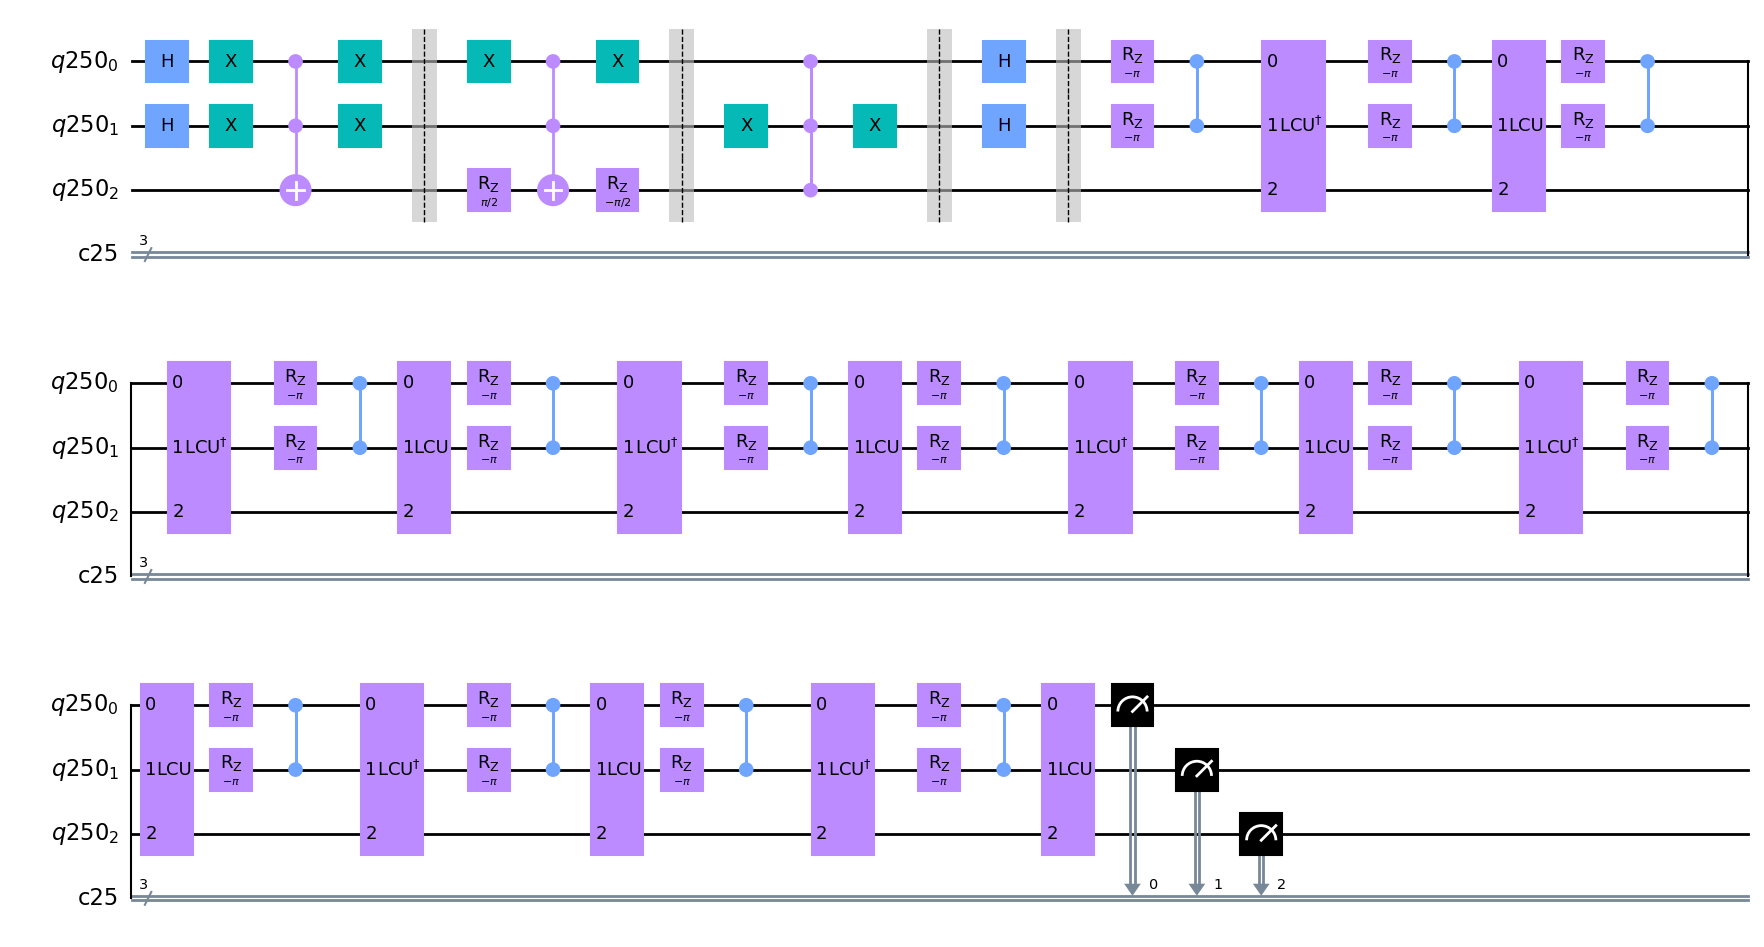

In [90]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
# ancreg = AncillaRegister(1)
# anc = AncillaQubit(ancreg, 0)
# qc = QuantumCircuit(q, c, ancreg)
qc = QuantumCircuit(q, c)

# qc.initialize(psiS, [q[0],q[1]])

qc.h([0, 1])
# qc.rx(pi/3, [0, 1])
# qc.ry(pi/4, [0, 1])


# qc.initialize(vec, [q[2], q[3]])
qc.x([0, 1])
qc.ccx(0, 1, 2)
qc.x([0, 1])

qc.barrier()
qc.x(0)
qc.rz(pi/2, 2)
qc.ccx(0, 1, 2)
qc.rz(-pi/2, 2)
qc.x(0)

qc.barrier()
qc.x(1)
qc.ccz(0, 1, 2)
qc.x(1)

qc.barrier()
# qc.rx(-pi/3, [0, 1])
# qc.ry(-pi/4, [0, 1])

qc.h([0, 1])
# qc.append(prepd(),[q for q in range(3)])

qc.barrier()
for l in range(7):
    qc.rz(-pi, [0,1])
    qc.cz(0,1)
    qc.append(reverse_gate(lcu()),[q for q in range(3)])
    qc.rz(-pi, [0,1])
    qc.cz(0,1)
    
    qc.append(lcu(),[q for q in range(3)])
# qc.measure(range(n-1), range(n-1))
qc.measure(range(n), range(n))

qc.draw('mpl')

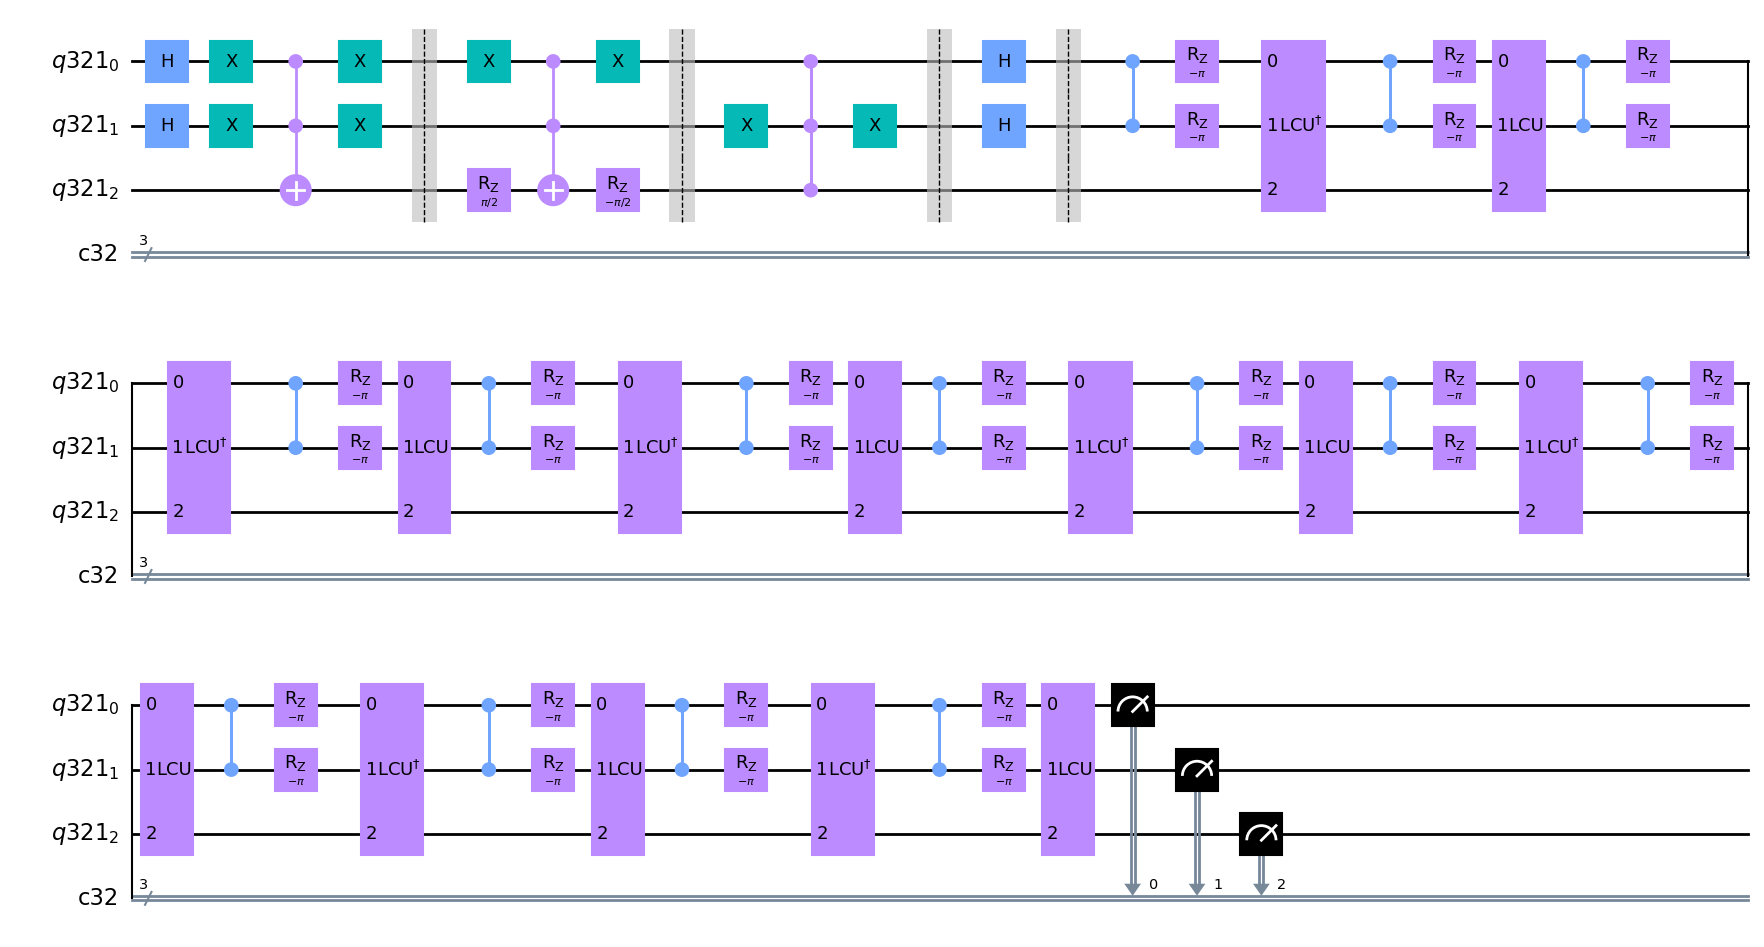

In [121]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
# ancreg = AncillaRegister(1)
# anc = AncillaQubit(ancreg, 0)
# qc = QuantumCircuit(q, c, ancreg)
qc = QuantumCircuit(q, c)

# qc.initialize(psiS, [q[0],q[1]])

qc.h([0, 1])
# qc.rx(pi/3, [0, 1])
# qc.ry(pi/4, [0, 1])


# qc.initialize(vec, [q[2], q[3]])
qc.x([0, 1])
qc.ccx(0, 1, 2)
qc.x([0, 1])

qc.barrier()
qc.x(0)
qc.rz(pi/2, 2)
qc.ccx(0, 1, 2)
qc.rz(-pi/2, 2)
qc.x(0)

qc.barrier()
qc.x(1)
qc.ccz(0, 1, 2)
qc.x(1)

qc.barrier()
# qc.rx(-pi/3, [0, 1])
# qc.ry(-pi/4, [0, 1])

qc.h([0, 1])
# qc.append(prepd(),[q for q in range(3)])

qc.barrier()
for l in range(7):
    qc.cz(1,0)
    qc.rz(-pi, [0,1])
    qc.append(reverse_gate(lcu()),[q for q in range(3)])
    
    qc.cz(1,0)
    qc.rz(-pi, [0,1])
    
    qc.append(lcu(),[q for q in range(3)])
# qc.measure(range(n-1), range(n-1))
qc.measure(range(n), range(n))

qc.draw('mpl')

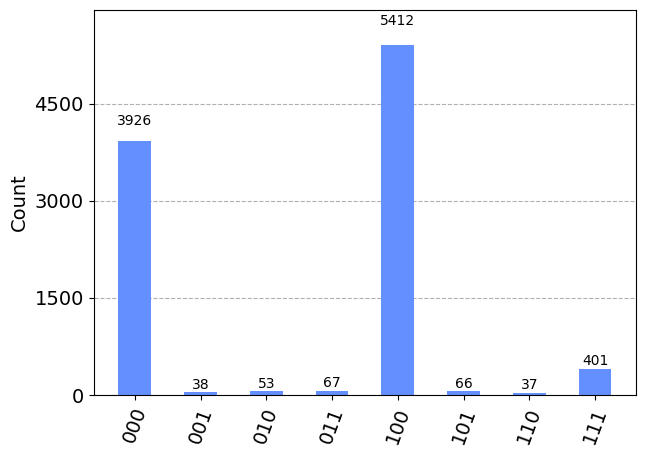

In [122]:
num_shot = 10000
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
shots = num_shot
backend = Aer.get_backend('aer_simulator')
result = execute(qc, backend, shots=shots).result()
# result = sim.run(qc).result() # Do the simulation and return the result
counts = result.get_counts()
# state_vector = result.get_statevector()

for i in dic:
    if i not in counts:
        counts[i] = 0
plot_histogram(counts)

In [19]:
R = np.diag([-1, 1, 1,1])

In [61]:
np.linalg.inv(m)

array([[-1., -0., -0., -0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [62]:
n = np.diag([1,1,1,-1])

In [63]:
 n@m

array([[-1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0, -1]])

In [14]:
from qiskit import QuantumCircuit, transpile

In [22]:
qc2 = QuantumCircuit(2)
qc2.unitary(R, [0, 1])
trans_qc = transpile (qc2, basis_gates=('rx','rz', 'cz'))
trans_qc.draw()

┌────────┐
q_0: ─■─┤ Rz(-π) ├
      │ ├────────┤
q_1: ─■─┤ Rz(-π) ├
        └────────┘

$A|\psi\rangle=(\beta_0 I+\beta_1X+\beta_2Y+\beta_3Z)|\psi\rangle$

In [12]:
from qiskit.quantum_info import Pauli

In [93]:
sigma_x=np.array([[0,1],[1,0]])
sigma_y=np.array([[0,1j],[1j,0]])
sigma_z=np.array([[1,0],[0,-1]])
sigma_0=np.array([[1,0],[0,1]])

In [94]:
A = 1/2*(sigma_0+sigma_x+sigma_y+sigma_z)
A

array([[1. +0.j , 0.5+0.5j],
       [0.5+0.5j, 0. +0.j ]])

In [104]:
norm = np.linalg.norm(A@[1, 0])

In [105]:
A@[1, 0]/norm

array([0.81649658+0.j        , 0.40824829+0.40824829j])

In [107]:
0.81649658**2, abs(0.40824829+0.40824829j)**2

(0.6666666651516965, 0.3333333325758483)

In [8]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

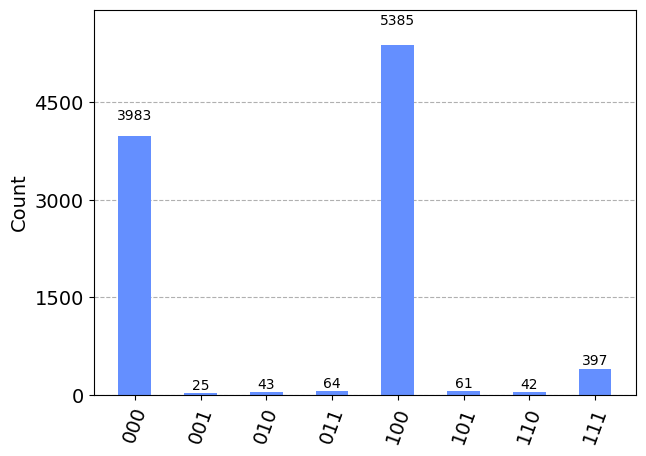

In [91]:
num_shot = 10000
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
shots = num_shot
backend = Aer.get_backend('aer_simulator')
result = execute(qc, backend, shots=shots).result()
# result = sim.run(qc).result() # Do the simulation and return the result
counts = result.get_counts()
# state_vector = result.get_statevector()

for i in dic:
    if i not in counts:
        counts[i] = 0
plot_histogram(counts)

In [ ]:
sim = Aer.get_backend('aer_unitary')

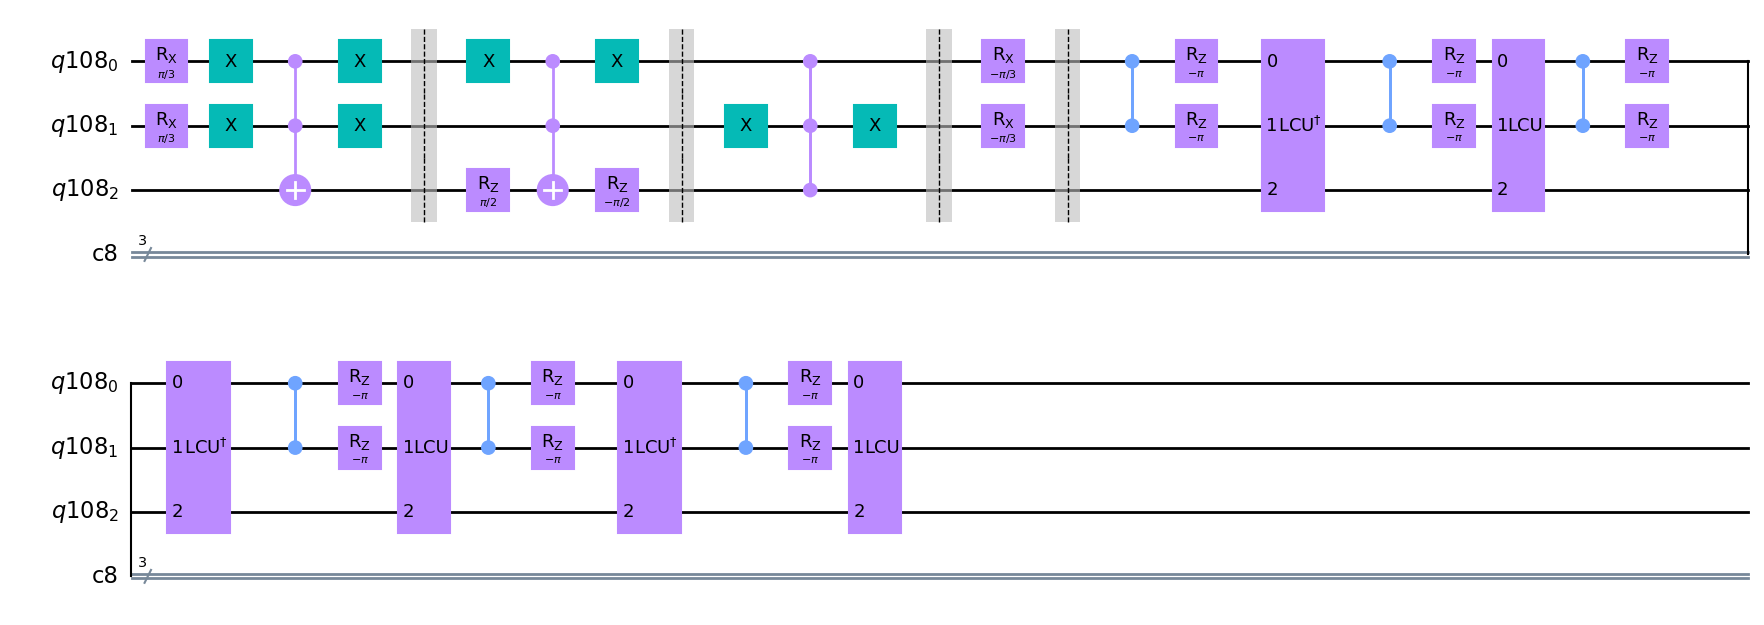

In [43]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
# ancreg = AncillaRegister(1)
# anc = AncillaQubit(ancreg, 0)
# qc = QuantumCircuit(q, c, ancreg)
qc = QuantumCircuit(q, c)
# qc.initialize(psiS, [q[0],q[1]])
# qc.h([0, 1])
qc.rx(pi/3, [0, 1])

# qc.initialize(vec, [q[2], q[3]])
qc.x([0, 1])
qc.ccx(0, 1, 2)
qc.x([0, 1])

qc.barrier()
qc.x(0)
qc.rz(pi/2, 2)
qc.ccx(0, 1, 2)
qc.rz(-pi/2, 2)
qc.x(0)

qc.barrier()
qc.x(1)
qc.ccz(0, 1, 2)
qc.x(1)

qc.barrier()
qc.rx(-pi/3, [0, 1])

# qc.h([0, 1])
qc.barrier()
for l in range(3):
    qc.cz(0,1)
    qc.rz(-pi, [0,1])
    qc.append(reverse_gate(lcu()),[q for q in range(3)])
    qc.cz(0,1)
    qc.rz(-pi, [0,1])
    
    qc.append(lcu(),[q for q in range(3)])
# qc.measure(range(n-1), range(n-1))

qc.draw('mpl')

In [44]:
backend = Aer.get_backend('unitary_simulator')
num_shot = 10000
shots = num_shot
job = execute(qc, backend, shots=shots)
result = job.result()
# result = sim.run(qc).result() # Do the simulation and return the result

In [50]:
print(result.get_unitary(qc, 1))

Operator([[ 0.1-0.1j, -0.1+0.2j, -0.3+0.j ,  0. +0.j ,  0.2-0.2j,
            0.4+0.7j,  0.4-0.1j,  0.1+0.j ],
          [-0.3-0.1j,  0.7-0.1j, -0.1+0.2j, -0. +0.1j, -0. +0.2j,
           -0.3+0.2j,  0.1-0.1j,  0. +0.3j],
          [ 0. -0.j , -0.1+0.1j,  0.3+0.3j, -0.1+0.2j,  0.2+0.3j,
            0.1-0.3j,  0.5+0.2j,  0.4+0.2j],
          [ 0. -0.j , -0.1+0.1j,  0. -0.2j,  0.7-0.2j, -0.3+0.1j,
           -0. +0.j , -0. -0.2j,  0.2+0.5j],
          [ 0.3-0.8j,  0.1-0.3j,  0.3-0.1j,  0. +0.j , -0.3+0.j ,
            0. +0.1j, -0. +0.1j,  0.2-0.1j],
          [ 0.2+0.2j,  0.4+0.j ,  0.1-0.3j,  0.2+0.1j,  0.1+0.5j,
            0.4-0.j ,  0.1+0.2j, -0.3-0.2j],
          [-0.1+0.1j,  0.1+0.j ,  0.4-0.5j, -0.4-0.2j, -0.1-0.3j,
            0.2-0.j ,  0.2+0.j ,  0. +0.4j],
          [-0.1-0.2j,  0.1+0.2j,  0. -0.2j,  0.1+0.3j,  0.5-0.1j,
            0.2-0.j , -0.6+0.1j,  0.2+0.2j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [123]:
qc3 = QuantumCircuit(2)
qc3.cz(1, 0)
qc3.rz(-pi, [0, 1])
backend = Aer.get_backend('unitary_simulator')
num_shot = 10000
shots = num_shot
job = execute(qc3, backend, shots=shots)
result = job.result()
print(result.get_unitary(qc3, 1))

Operator([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
